# Árvore de decisão

### Base de dados: Clima-Nominal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

-------------------------------------------------------------------------------

WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}





### Inicialização da plataforma do Colab.

Essa seção instala e carrega os pacotes necessários para a execução do código.

In [1]:
%pip install pydotplus
%pip install dtreeviz

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24636 sha256=e6e04b8186b8b9721d68caa47adfcdeef0cdb692e5085010cf5b9099cabe7ece
  Stored in directory: /Users/guilhermeaggio/Library/Caches/pip/wheels/77/54/7c/c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dtreeviz]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


# WEATHER.NOMINAL, Weka
# http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html
# DESCRIÇÃO DOS ATRIBUTOS:
# Aparência {Ensolarado, Nublado, Chuvoso}
# Temperatura {Quente, Moderado, Frio}
# Umidade {Alta, Normal}
# Vento {Fraco, Forte}
# Jogar {Sim, Não}

### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [33]:
clima_nominal = pd.read_csv("./data/clima.csv", sep=";") 
clima_nominal.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [34]:
X_dict = clima_nominal.iloc[:,0:4].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)

le = LabelEncoder()
y_train = le.fit_transform(clima_nominal.iloc[:,4])

print("Labels:", y_train)

Labels: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [32]:
print("Data shape: ", clima_nominal.shape)
print("Features: ", clima_nominal.keys())

Data shape:  (14, 5)
Features:  Index(['Aparência', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [20]:
dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtree.fit(X_train, y_train)
print("Accuracy:", dtree.score(X_train, y_train))

y_pred = dtree.predict(X_train)
print("Pred accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não", "Jogar=Sim"], columns=["Jogar(prev)=Não", "Prev. Jogar(prev)=Sim"])
print(cnf_table)


Accuracy: 1.0
Pred accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

           Jogar(prev)=Não  Prev. Jogar(prev)=Sim
Jogar=Não                5                      0
Jogar=Sim                0                      9


### Exibição da árvore de decisão



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


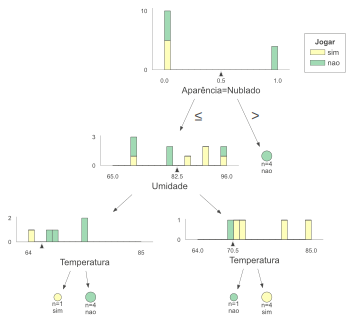

In [19]:
import dtreeviz

viz = dtreeviz.model(dtree,
              X_train,
              y_train,
              target_name='Jogar',
               feature_names=vect.feature_names_,
              class_names=["sim", "nao"])  

viz.view()

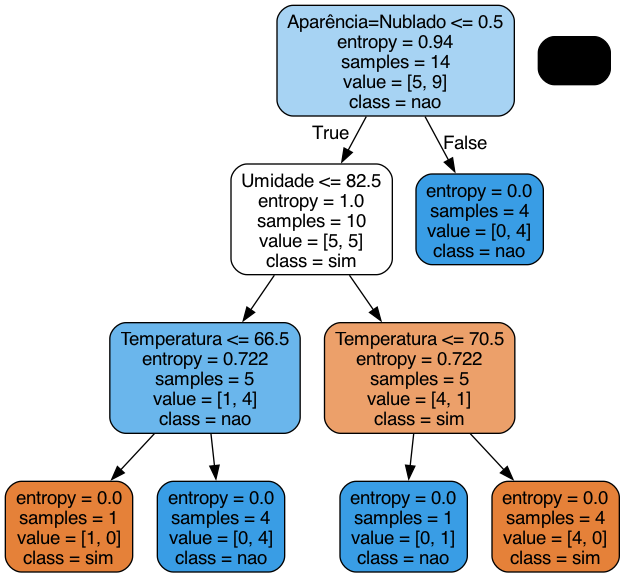

In [18]:
import pydotplus
from IPython.display import Image, display

# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=["sim", "nao"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
display(Image(data=graph.create_png()))